In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, probplot

# Data Types for feature classification
df = pd.read_csv('BankChurners.csv')
for column in df.columns:
    print(f"{column}: {df[column].dtype}")


CLIENTNUM: int64
Attrition_Flag: object
Customer_Age: int64
Gender: object
Dependent_count: int64
Education_Level: object
Marital_Status: object
Unnamed: 7: float64
Card_Category: object
Months_on_book: int64
Total_Relationship_Count: int64
Months_Inactive_12_mon: int64
Contacts_Count_12_mon: int64
Credit_Limit: float64
Total_Revolving_Bal: int64
Avg_Open_To_Buy: float64
Total_Amt_Chng_Q4_Q1: float64
Total_Trans_Amt: int64
Total_Trans_Ct: int64
Total_Ct_Chng_Q4_Q1: float64
Avg_Utilization_Ratio: float64


In [5]:
# Check for missing values and data types
print(df.isnull().sum())
# Identifying unique values per column
for column in df.columns:
    print(f"{column} unique values:", df[column].unique())


CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Unnamed: 7                  10127
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
dtype: int64
CLIENTNUM unique values: [768805383 818770008 713982108 ... 716506083 717406983 714337233]
Attrition_Flag unique values: ['Existing Customer' 'Attrited Customer']
Customer_Age unique values: [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46

In [7]:
# Summary statistics for each numeric column
summary = df.describe()
print(summary)


          CLIENTNUM  Customer_Age  Dependent_count  Unnamed: 7  \
count  1.012700e+04  10127.000000     10127.000000         0.0   
mean   7.391776e+08     46.325960         2.346203         NaN   
std    3.690378e+07      8.016814         1.298908         NaN   
min    7.080821e+08     26.000000         0.000000         NaN   
25%    7.130368e+08     41.000000         1.000000         NaN   
50%    7.179264e+08     46.000000         2.000000         NaN   
75%    7.731435e+08     52.000000         3.000000         NaN   
max    8.283431e+08     73.000000         5.000000         NaN   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
count    10127.000000              10127.000000            10127.000000   
mean        35.928409                  3.812580                2.341167   
std          7.986416                  1.554408                1.010622   
min         13.000000                  1.000000                0.000000   
25%         31.000000         

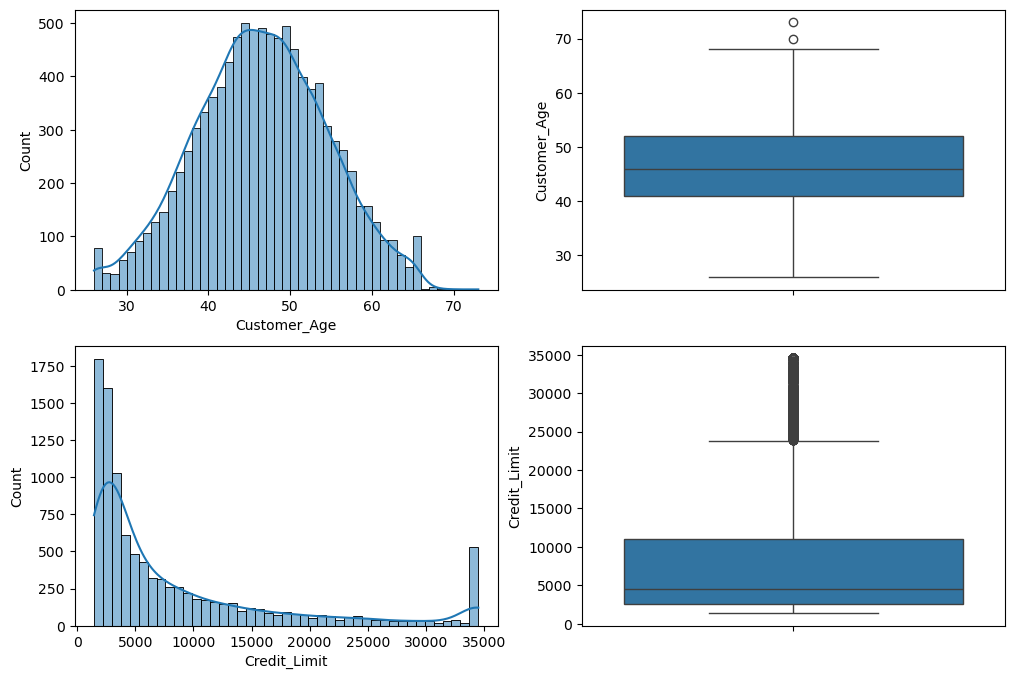

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms and box plots for Customer_Age and Credit_Limit
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['Customer_Age'], ax=axes[0, 0], kde=True)
sns.boxplot(df['Customer_Age'], ax=axes[0, 1])
sns.histplot(df['Credit_Limit'], ax=axes[1, 0], kde=True)
sns.boxplot(df['Credit_Limit'], ax=axes[1, 1])
plt.show()


In [11]:
# Treating outliers using IQR
Q1 = df['Credit_Limit'].quantile(0.25)
Q3 = df['Credit_Limit'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df['Credit_Limit'] >= Q1 - 1.5 * IQR) & (df['Credit_Limit'] <= Q3 + 1.5 * IQR)]


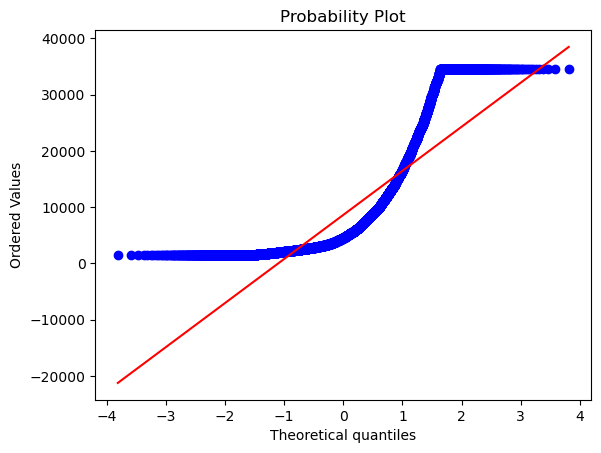

In [13]:
from scipy.stats import probplot

# Q-Q plot for Credit_Limit
probplot(df['Credit_Limit'], dist="norm", plot=plt)
plt.show()


In [15]:
# Correlation analysis for numeric columns
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
print(correlation_matrix['Credit_Limit'].sort_values(ascending=False))


Credit_Limit                1.000000
Avg_Open_To_Buy             0.995981
Total_Trans_Amt             0.171730
Total_Trans_Ct              0.075927
Dependent_count             0.068065
Total_Revolving_Bal         0.042493
Contacts_Count_12_mon       0.020817
Total_Amt_Chng_Q4_Q1        0.012813
Months_on_book              0.007507
CLIENTNUM                   0.005708
Customer_Age                0.002476
Total_Ct_Chng_Q4_Q1        -0.002020
Months_Inactive_12_mon     -0.020394
Total_Relationship_Count   -0.071386
Avg_Utilization_Ratio      -0.482965
Unnamed: 7                       NaN
Name: Credit_Limit, dtype: float64


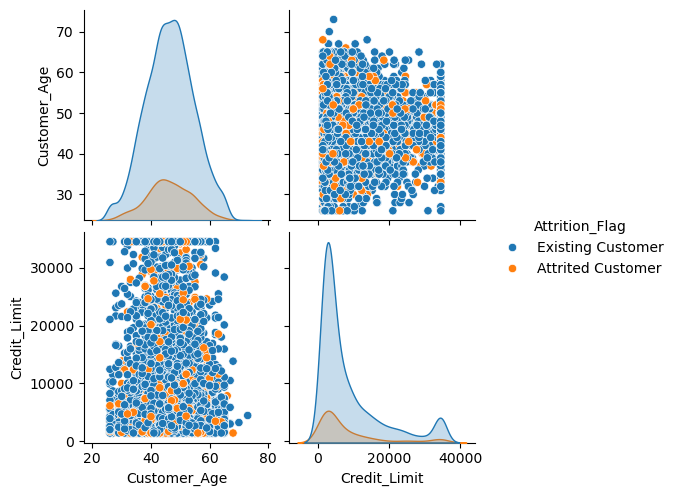

In [17]:
# Pair plot for sampled data
sample_df = df.sample(n=5000, random_state=42)
sns.pairplot(sample_df, vars=['Customer_Age', 'Credit_Limit'], hue='Attrition_Flag')
plt.show()


In [19]:
from scipy.stats import mannwhitneyu

# Separate churned and existing customers
churned = df[df['Attrition_Flag'] == 'Attrited Customer']['Credit_Limit']
existing = df[df['Attrition_Flag'] == 'Existing Customer']['Credit_Limit']

# Mann-Whitney U Test
stat, p_value = mannwhitneyu(churned, existing)
print(f"Mann-Whitney U test: Stat={stat}, p-value={p_value}")


Mann-Whitney U test: Stat=6361348.0, p-value=3.0078405911217975e-07


In [21]:
import numpy as np

# Calculate margin of error for a confidence interval
margin_of_error = 1.96 * (np.std(churned - existing) / np.sqrt(len(df)))
print(f"Margin of Error: {margin_of_error}")


Margin of Error: nan


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Customer_Age', 'Total_Trans_Amt']]
y = df['Credit_Limit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 80179151.81629695
R^2 Score: 0.03138038504200391


In [25]:
# Adding new features for prediction improvement
df['Age_Trans_Ratio'] = df['Customer_Age'] / (df['Total_Trans_Amt'] + 1)  # Avoid division by zero
df['Trans_Credit_Ratio'] = df['Total_Trans_Amt'] / (df['Credit_Limit'] + 1)
